In [34]:
import pandas as pd
import numpy as np
import sklearn

In [35]:
df_stud_mat = pd.read_csv("/content/student-mat.csv",sep=";")
df_stud_por = pd.read_csv("/content/student-por.csv",sep=";")




In [36]:
df=pd.merge(df_stud_mat,df_stud_por,suffixes=('_mat','_por'), on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [37]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          382 non-null    object
 1   sex             382 non-null    object
 2   age             382 non-null    int64 
 3   address         382 non-null    object
 4   famsize         382 non-null    object
 5   Pstatus         382 non-null    object
 6   Medu            382 non-null    int64 
 7   Fedu            382 non-null    int64 
 8   Mjob            382 non-null    object
 9   Fjob            382 non-null    object
 10  reason          382 non-null    object
 11  guardian_mat    382 non-null    object
 12  traveltime_mat  382 non-null    int64 
 13  studytime_mat   382 non-null    int64 
 14  failures_mat    382 non-null    int64 
 15  schoolsup_mat   382 non-null    object
 16  famsup_mat      382 non-null    object
 17  paid_mat        382 non-null    object
 18  activities

""


In [38]:

anagr=['school','sex','age','address','famsize','internet','Pstatus','Medu','Fedu','Mjob',"Fjob","reason","nursery"]
mat=['guardian_mat', 'traveltime_mat', 'studytime_mat', 'failures_mat',
       'schoolsup_mat', 'famsup_mat', 'paid_mat', 'activities_mat',
       'higher_mat', 'romantic_mat', 'famrel_mat', 'freetime_mat', 'goout_mat',
       'Dalc_mat', 'Walc_mat', 'health_mat', 'absences_mat']
por=[  'higher_por', 'romantic_por',
       'famrel_por', 'Dalc_por', 'Walc_por',
       'health_por']


#df=df.drop(columns=anagr+mat+por)

In [39]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_mat', 'traveltime_mat',
       'studytime_mat', 'failures_mat', 'schoolsup_mat', 'famsup_mat',
       'paid_mat', 'activities_mat', 'nursery', 'higher_mat', 'internet',
       'romantic_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat',
       'Walc_mat', 'health_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'guardian_por', 'traveltime_por', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'higher_por', 'romantic_por', 'famrel_por', 'freetime_por', 'goout_por',
       'Dalc_por', 'Walc_por', 'health_por', 'absences_por', 'G1_por',
       'G2_por', 'G3_por'],
      dtype='object')

In [40]:
pd.set_option('display.max_columns', 52)
df.select_dtypes(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,guardian_por,schoolsup_por,famsup_por,paid_por,activities_por,higher_por,romantic_por
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,mother,yes,no,no,no,yes,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,father,no,yes,no,no,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,mother,yes,no,no,no,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,mother,no,yes,no,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,father,no,yes,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,yes,no,yes,yes,yes,no,mother,no,yes,no,no,yes,no
378,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no,mother,no,no,no,yes,yes,yes
379,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no,mother,no,no,no,yes,yes,no
380,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no,mother,no,no,no,no,yes,no


In [41]:
df_encode = pd.get_dummies(df)

In [42]:
y=df_encode.G3_mat
exclude_var=['G1_mat','G2_mat','G3_mat','G1_por','G2_por','G3_por']
print(exclude_var)
X=df_encode.drop(columns=exclude_var)

['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por']


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  382 non-null    int64
 1   Medu                 382 non-null    int64
 2   Fedu                 382 non-null    int64
 3   traveltime_mat       382 non-null    int64
 4   studytime_mat        382 non-null    int64
 5   failures_mat         382 non-null    int64
 6   famrel_mat           382 non-null    int64
 7   freetime_mat         382 non-null    int64
 8   goout_mat            382 non-null    int64
 9   Dalc_mat             382 non-null    int64
 10  Walc_mat             382 non-null    int64
 11  health_mat           382 non-null    int64
 12  absences_mat         382 non-null    int64
 13  traveltime_por       382 non-null    int64
 14  studytime_por        382 non-null    int64
 15  failures_por         382 non-null    int64
 16  famrel_por           382 n

In [44]:
X.describe()

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,school_GP,school_MS,sex_F,...,paid_mat_yes,activities_mat_no,activities_mat_yes,nursery_no,nursery_yes,higher_mat_no,higher_mat_yes,internet_no,internet_yes,romantic_mat_no,romantic_mat_yes,guardian_por_father,guardian_por_mother,guardian_por_other,schoolsup_por_no,schoolsup_por_yes,famsup_por_no,famsup_por_yes,paid_por_no,paid_por_yes,activities_por_no,activities_por_yes,higher_por_no,higher_por_yes,romantic_por_no,romantic_por_yes
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.00000,382.00000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,0.895288,0.104712,0.518325,...,0.463351,0.473822,0.526178,0.188482,0.811518,0.047120,0.952880,0.151832,0.848168,0.683246,0.316754,0.238220,0.719895,0.041885,0.869110,0.130890,0.374346,0.625654,0.931937,0.068063,0.47644,0.52356,0.047120,0.952880,0.678010,0.321990
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,0.306584,0.306584,0.500319,...,0.499309,0.499969,0.499969,0.391609,0.391609,0.212174,0.212174,0.359329,0.359329,0.465821,0.465821,0.426553,0.449639,0.200589,0.337722,0.337722,0.484588,0.484588,0.252184,0.252184,0.50010,0.50010,0.212174,0.212174,0.467852,0.467852
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.00000,0.000000,1.000000,1.000000,0.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0000

In [45]:
y.value_counts()

10    56
11    43
0     39
15    32
8     31
12    30
9     27
14    27
13    25
16    17
6     15
18    13
7      7
5      7
17     6
19     5
20     1
4      1
Name: G3_mat, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=2)

In [51]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((191, 81), (191,), (191, 81), (191,))

In [47]:
#TEST TO FIND THE SAME INSTANCES IN TRAIN AND TEST
covariate=list(X_train.columns)
pd.merge(X_train,X_test,on=covariate[:])
#pd.merge(X_train,X_test,on=top5)

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,school_GP,school_MS,sex_F,...,paid_mat_yes,activities_mat_no,activities_mat_yes,nursery_no,nursery_yes,higher_mat_no,higher_mat_yes,internet_no,internet_yes,romantic_mat_no,romantic_mat_yes,guardian_por_father,guardian_por_mother,guardian_por_other,schoolsup_por_no,schoolsup_por_yes,famsup_por_no,famsup_por_yes,paid_por_no,paid_por_yes,activities_por_no,activities_por_yes,higher_por_no,higher_por_yes,romantic_por_no,romantic_por_yes


In [29]:
# 0 rows no instances

In [52]:

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((191, 81), (191,), (191, 81), (191,))

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

#from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(random_state=0,max_iter=1000)
#clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=3, random_state=0)

In [54]:
Y_pred = clf.predict(X_train)

In [55]:
Y_pred

array([10,  0, 14,  9, 14,  0, 12, 14, 14, 14, 14, 14, 14, 10, 10, 10, 14,
       14, 14,  0,  9, 10, 15, 14, 10, 14, 11, 10, 14, 14, 14, 14, 10, 15,
       15,  0,  9,  0, 14, 10,  0, 14, 14, 14, 14, 10,  0, 14,  8,  0, 14,
        0,  0, 14,  8, 14,  9, 14, 14, 14, 14,  0, 14, 10, 10, 15, 15, 14,
        0,  0, 14, 14, 15,  0,  0,  9, 10, 11, 14, 14,  8, 10, 14,  8, 14,
       10, 13, 14, 10,  9, 10,  0, 14, 10, 10, 15,  8,  9, 14,  0, 10,  0,
       10,  0, 14, 14, 10, 14, 10,  9,  0, 14, 13,  9,  9,  8, 14, 14, 11,
        0, 10, 14, 10, 10,  0, 10, 14, 15, 11,  0,  8, 10, 14, 10, 11, 10,
        9,  0, 14, 14, 14, 10,  9,  0,  0, 14, 10,  0, 10, 10, 10, 10, 14,
       10,  0, 14, 14, 14,  8,  0,  8, 14,  9,  0,  9, 14, 11, 14, 10, 14,
       14,  0, 14, 14,  0,  8, 14, 10, 14, 14,  0, 10, 13, 14, 11, 10, 14,
       10,  8, 14, 10])

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train, Y_pred))              

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        21
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           8       0.73      0.47      0.57        17
           9       0.86      0.71      0.77        17
          10       0.44      0.83      0.58        23
          11       1.00      0.41      0.58        17
          12       1.00      0.07      0.13        14
          13       1.00      0.27      0.43        11
          14       0.30      0.95      0.45        22
          15       0.75      0.35      0.48        17
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         8
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
Y_pred = clf.predict(X_test)

In [59]:
print(classification_report(y_test, Y_pred))   

              precision    recall  f1-score   support

           0       0.38      0.67      0.48        18
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         3
           8       0.29      0.29      0.29        14
           9       0.00      0.00      0.00        10
          10       0.27      0.42      0.33        33
          11       0.67      0.08      0.14        26
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00         5
          15       0.50      0.07      0.12        15
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         3

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
clf.feature_importances_

array([0.02772808, 0.01775468, 0.02478272, 0.01365953, 0.01584851,
       0.06981796, 0.02147046, 0.01404631, 0.01208335, 0.02229092,
       0.03846981, 0.02032044, 0.09819503, 0.01302382, 0.01618931,
       0.01226326, 0.01534169, 0.00728984, 0.01080387, 0.02806089,
       0.02230618, 0.0184308 , 0.04523408, 0.00380552, 0.00631203,
       0.00653144, 0.00662072, 0.00558893, 0.00352925, 0.01174158,
       0.01050501, 0.00704316, 0.00885651, 0.00085227, 0.00631205,
       0.01180396, 0.00714031, 0.00251056, 0.00262316, 0.00186439,
       0.01203934, 0.00430301, 0.00210723, 0.02110718, 0.00651903,
       0.00253499, 0.03623026, 0.00307147, 0.00122041, 0.01003584,
       0.01209068, 0.00699885, 0.        , 0.00778677, 0.01516243,
       0.00419124, 0.01102808, 0.00951099, 0.00089253, 0.00794192,
       0.00651278, 0.00696349, 0.00294472, 0.00109716, 0.01728253,
       0.01005421, 0.00287541, 0.00244967, 0.00540578, 0.00996443,
       0.0100735 , 0.00281206, 0.00679021, 0.00096806, 0.00103

In [61]:
plotdf=pd.DataFrame({"name":X.columns, "importance":clf.feature_importances_})

In [62]:
plotdf=plotdf.sort_values(by="importance",ascending=False,ignore_index=True).head(20)

In [63]:
top5=list(plotdf.sort_values(by="importance",ascending=False,ignore_index=True).head(20).name.values)

In [64]:
top5

['absences_mat',
 'failures_mat',
 'absences_por',
 'Walc_mat',
 'reason_reputation',
 'Dalc_por',
 'age',
 'Fedu',
 'Walc_por',
 'Dalc_mat',
 'famrel_mat',
 'reason_course',
 'health_mat',
 'romantic_por_yes',
 'health_por',
 'Medu',
 'romantic_mat_no',
 'studytime_por',
 'studytime_mat',
 'famrel_por']

[Text(0, 0, 'absences_mat'),
 Text(0, 0, 'failures_mat'),
 Text(0, 0, 'absences_por'),
 Text(0, 0, 'Walc_mat'),
 Text(0, 0, 'reason_reputation'),
 Text(0, 0, 'Dalc_por'),
 Text(0, 0, 'age'),
 Text(0, 0, 'Fedu'),
 Text(0, 0, 'Walc_por'),
 Text(0, 0, 'Dalc_mat'),
 Text(0, 0, 'famrel_mat'),
 Text(0, 0, 'reason_course'),
 Text(0, 0, 'health_mat'),
 Text(0, 0, 'romantic_por_yes'),
 Text(0, 0, 'health_por'),
 Text(0, 0, 'Medu'),
 Text(0, 0, 'romantic_mat_no'),
 Text(0, 0, 'studytime_por'),
 Text(0, 0, 'studytime_mat'),
 Text(0, 0, 'famrel_por')]

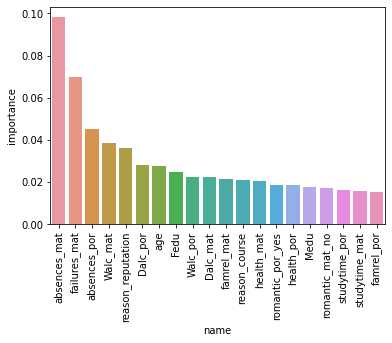

In [68]:
import seaborn as sns
ax=sns.barplot(x="name", y="importance", data=plotdf,orient="v")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


In [69]:
from sklearn.metrics import confusion_matrix

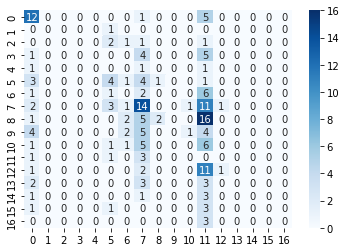

In [70]:
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True,cmap='Blues')

